# IMPORT DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'glucose', 'bloodpres', 'skin thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class']
pima=read_csv(url, names=names)
from sklearn.linear_model import LogisticRegression 
import warnings
warnings.filterwarnings("ignore")

# DATA ANALYSIS

In [2]:
pima.head()

,preg,glucose,bloodpres,skin thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.tail()

,preg,glucose,bloodpres,skin thickness,insulin,bmi,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
pima.isnull().sum()

preg              0
glucose           0
bloodpres         0
skin thickness    0
insulin           0
bmi               0
pedigree          0
age               0
class             0
dtype: int64

In [5]:
pima.dtypes

preg                int64
glucose             int64
bloodpres           int64
skin thickness      int64
insulin             int64
bmi               float64
pedigree          float64
age                 int64
class               int64
dtype: object

In [6]:
pima.describe()

,preg,glucose,bloodpres,skin thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima.corr()

,preg,glucose,bloodpres,skin thickness,insulin,bmi,pedigree,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


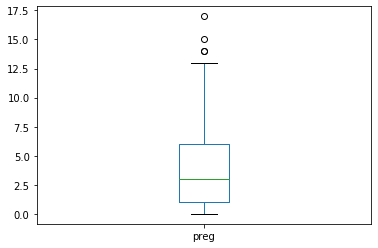

In [8]:
pima["preg"].plot.box()

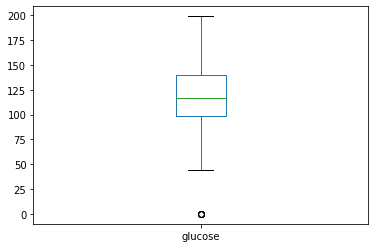

In [9]:
pima["glucose"].plot.box()

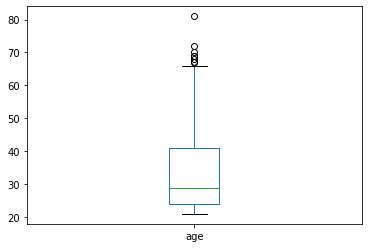

In [10]:
pima["age"].plot.box()

# DATA CLEANING

In [11]:
from scipy.stats import zscore

In [12]:
z=np.abs(zscore(pima))

In [13]:
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [14]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [15]:
print(z[4][6])

5.484909100466951


In [16]:
Q1=pima.quantile(0.25)
Q3=pima.quantile(0.75)
IQR=Q3-Q1
print(IQR)

preg                5.0000
glucose            41.2500
bloodpres          18.0000
skin thickness     32.0000
insulin           127.2500
bmi                 9.3000
pedigree            0.3825
age                17.0000
class               1.0000
dtype: float64


In [17]:
print(pima<(Q1-1.5*IQR))|(pima>(Q3+1.5*IQR))

      preg  glucose  bloodpres  skin thickness  insulin    bmi  pedigree  \
0    False    False      False           False    False  False     False   
1    False    False      False           False    False  False     False   
2    False    False      False           False    False  False     False   
3    False    False      False           False    False  False     False   
4    False    False      False           False    False  False     False   
..     ...      ...        ...             ...      ...    ...       ...   
763  False    False      False           False    False  False     False   
764  False    False      False           False    False  False     False   
765  False    False      False           False    False  False     False   
766  False    False      False           False    False  False     False   
767  False    False      False           False    False  False     False   

       age  class  
0    False  False  
1    False  False  
2    False  False  
3    Fa

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [18]:
pima=pima[(z<3).all(axis=1)]

In [19]:
pima

,preg,glucose,bloodpres,skin thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
pima.shape

(688, 9)

# EDA PROCESS

In [21]:
pima.isnull().sum()

preg              0
glucose           0
bloodpres         0
skin thickness    0
insulin           0
bmi               0
pedigree          0
age               0
class             0
dtype: int64

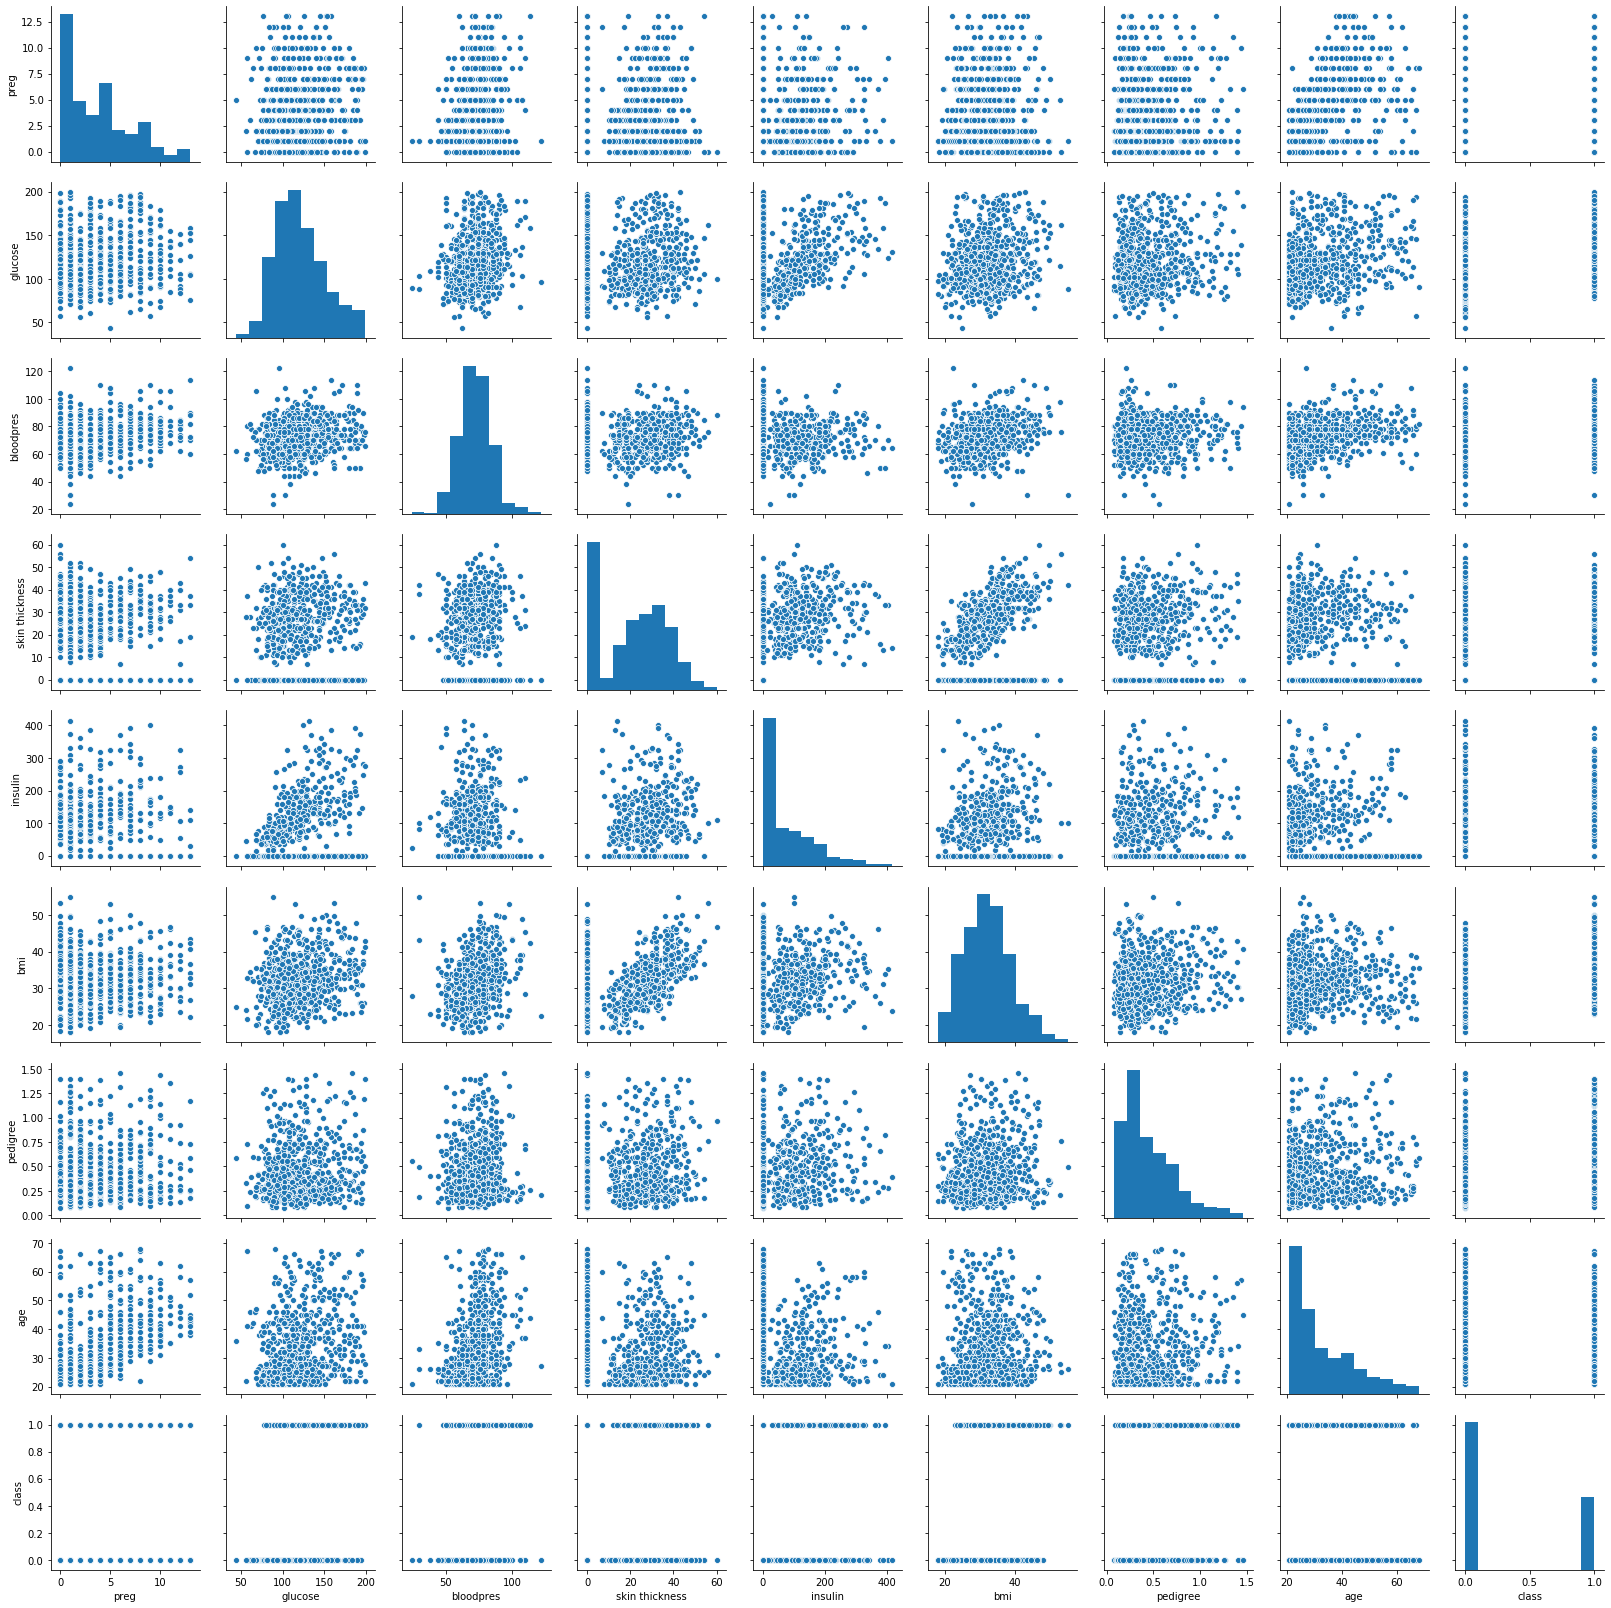

In [22]:
sns.pairplot(pima)

# SPLITTING DATASET ITNO X AND Y FOR TRAING AND TESTING

In [23]:
x=pima.drop("class",axis=1)
x

,preg,glucose,bloodpres,skin thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y=pima["class"]
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 688, dtype: int64

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=151)

In [75]:
x_train.shape

(543, 8)

In [76]:
y_train.shape

(543,)

In [77]:
x_test.shape

(145, 8)

In [78]:
y_test.shape

(145,)

# APPLYING MODEL AND ALGORITHM

In [79]:
lg=LogisticRegression()

In [80]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)

In [82]:
lg.score(x_train,y_train)

0.7716390423572744

In [83]:
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8137931034482758
[[90  6]
 [21 28]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        96
           1       0.82      0.57      0.67        49

    accuracy                           0.81       145
   macro avg       0.82      0.75      0.77       145
weighted avg       0.82      0.81      0.80       145



In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [85]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
mnb=accuracy_score(y_test,predmnb)
print(mnb)
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6206896551724138
[[71 25]
 [30 19]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        96
           1       0.43      0.39      0.41        49

    accuracy                           0.62       145
   macro avg       0.57      0.56      0.56       145
weighted avg       0.61      0.62      0.62       145



In [86]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
gnb=accuracy_score(y_test,predgnb)
print(gnb)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7793103448275862
[[78 18]
 [14 35]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        96
           1       0.66      0.71      0.69        49

    accuracy                           0.78       145
   macro avg       0.75      0.76      0.76       145
weighted avg       0.78      0.78      0.78       145



In [87]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6620689655172414
[[96  0]
 [49  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        96
           1       0.00      0.00      0.00        49

    accuracy                           0.66       145
   macro avg       0.33      0.50      0.40       145
weighted avg       0.44      0.66      0.53       145



In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7172413793103448
[[78 18]
 [23 26]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        96
           1       0.59      0.53      0.56        49

    accuracy                           0.72       145
   macro avg       0.68      0.67      0.68       145
weighted avg       0.71      0.72      0.71       145



In [89]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7241379310344828
[[77 19]
 [21 28]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        96
           1       0.60      0.57      0.58        49

    accuracy                           0.72       145
   macro avg       0.69      0.69      0.69       145
weighted avg       0.72      0.72      0.72       145



In [91]:
# COMPARISON BETWEEN MODELS
print(accuracy_score(y_test,predlg))
print(accuracy_score(y_test,predknn))
print(accuracy_score(y_test,preddtc))
print(accuracy_score(y_test,predsvc))
print(mnb)
print(gnb)

0.8137931034482758
0.7241379310344828
0.7172413793103448
0.6620689655172414
0.6206896551724138
0.7793103448275862
